# <span style="color:#F72585"><center>Introducción a Pyro</center></span>

## <span style="color:#4361EE">Pyro: Help</span> 

- Homepage: https://pyro.ai/
- Documentation: https://docs.pyro.ai/en/stable/
- Forum: https://forum.pyro.ai/

## <span style="color:#4361EE">¿Qué es Pyro?</span> 

Pyro es un lenguaje de programación probabilística de alto nivel escrito en Python y respaldado por [PyTorch](https://pytorch.org/) desde su backend. El usuario puede especificar o crear modelos estadísticos y hacer Inferencia Bayesiana a partir de ellos.    


## <span style="color:#4361EE">Motivación para Pyro y la Programación Probabilística</span> 

- Universal: Pyro puede representar cualquier distribución de probabilidad computable.
- Escalable: Pyro escala a grandes conjuntos de datos con poca sobrecarga.
- Mínimo: Pyro está implementado con un núcleo pequeño de abstracciones compuestas y poderosas.
- Flexible: Pyro tiene como objetivo la automatización cuando lo desee, el control cuando lo necesite.


## <span style="color:#4361EE">Inferencia. Lo que hay en el transfondo de Pyro</span> 

**Hamiltonian Monte Carlo (HMC)**

- *La distribución del parámetro es muestreada en un espacio sin restricciones*. La base teórica es el muestreador Monte Carlo Hamiltoniano, que permite escanear el espacio del parámetro de manera mucho más eficiente que lo que hacen los muestreadores clásicos Metrópolis- Hastings o Gibbs y sus derivados.
- *Transformaciones del parámetro*: Ajuste automático del Jacobiano asociado a las  transformaciones.
- *Diferenciación automática*: Gradientes del modelo con respecto a los parámetros usando diferenciación automática.

**No-U-Turn Sampler (NUTS)**

- *Ajuste (tunning)* automático de los parámetros del muestreador. 
- *Calentamiento*: Estimación de la matriz de masa y tamaño del paso del muestreador.
- *Muestreo*: Número adaptativo de pasos.
- *Mantiene el balance detallado*. Que asegura tener cadenas de Markov reversibles.

**Optimización: estimación modal**

- Métodos BFGS y Newton.

## <span style="color:#4361EE">Pyro para científicos y más...</span> 


- Lenguaje probabilístico flexible, el lenguaje sigue creciendo

- Enfoque en la ciencia: el modelado y los supuestos.

- Acceso a múltiples algoritmos (el valor predeterminado es bastante bueno)

- Más rápido y menos propenso a errores que la implementación desde cero

- Implementación eficiente

- Mucha ayuda de modelado (gratis) en la lista de usuarios

- Desarrolladores receptivos, soporte continuo para Pyro

- No solo por inferencia

- Muestreo de avance rápido; muchas distribuciones 

- Gradientes para funciones arbitrarias

## <span style="color:#4361EE">Un primer ejemplo</span> 


Introducimos un primer ejemplo general. El desarrollo completo de este ejemplo puede encontrarse en [Models in Pyro](https://pyro.ai/examples/intro_long.html)

### <span style="color:#4CC9F0">Modelo Estadístico</span>


Supongamos que tenemos observaciones $[y_n |x_n], n=1,\ldots,N$, y asumamos el modelo Bayesiano

$$
\begin{align*}
y_n &\sim \mathcal{N}(\alpha + \beta x_n, \sigma^2),\quad n=1,\ldots,N\\
\alpha &\sim \mathcal{N}(0, 100)\\
\beta &\sim \mathcal{N}(0, 100)\\
\sigma &\sim \mathcal{C}auchy(0, 25) 1_{\sigma>0}\\
\end{align*}
$$


In [4]:
#Importamos las librerías necesarias
import os
import torch
import torch.nn.functional as F
import pyro
import pyro.distributions as dist
import graphviz


In [23]:

def model():
    x = pyro.sample("x",dist.Beta(1,1))
    alpha = pyro.sample("alpha",dist.Normal(0,10))
    beta = pyro.sample("beta",dist.Normal(0,10))
    sigma = pyro.sample("sigma",dist.Cauchy(0,25))
    pyro.sample("y",dist.Normal(alpha+beta*x,sigma))


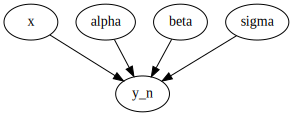

In [24]:
pyro.render_model(model, model_args=())